In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [95]:
import datetime

In [96]:
import pandas_datareader.data as web

In [97]:
start = datetime.datetime(2010,1,1)
end = datetime.datetime(2017,1,1)

In [101]:
tesla = web.DataReader('TSLA','google',start,end)

In [102]:
tesla.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-11-03,189.00,191.47,187.04,187.42,2653023
2016-11-04,189.00,193.46,185.96,190.56,5146043
2016-11-07,193.59,194.29,190.05,193.21,3870112
2016-11-08,193.79,197.49,191.26,194.94,3267580
2016-11-09,186.88,192.00,183.95,190.06,8173065


In [85]:
ford = web.DataReader('F','google',start,end)

In [86]:
gm = web.DataReader('GM','google',start,end)

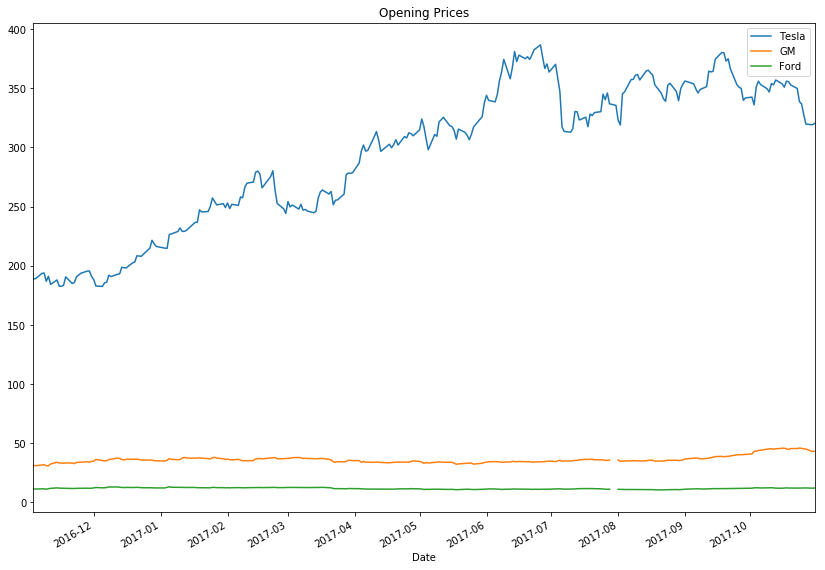

In [90]:
tesla['Open'].plot(label='Tesla',figsize=(14,10),title='Opening Prices')
gm['Open'].plot(label='GM')
ford['Open'].plot(label='Ford')
plt.legend();

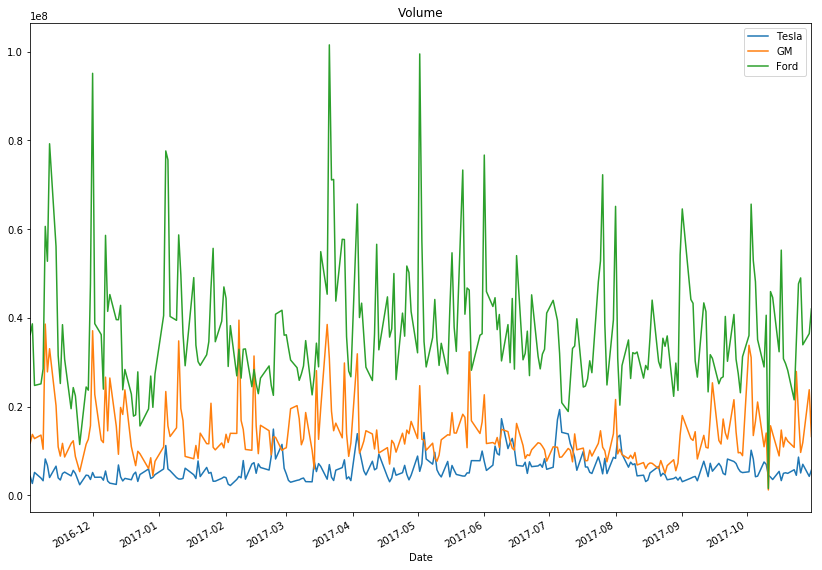

In [22]:
tesla['Volume'].plot(label='Tesla',figsize=(14,10),title='Volume')
gm['Volume'].plot(label='GM')
ford['Volume'].plot(label='Ford')
plt.legend();

In [24]:
tesla['Total Traded'] = tesla['Open']*tesla['Volume']
ford['Total Traded'] = ford['Open']*ford['Volume']
gm['Total Traded'] = gm['Open']*gm['Volume']

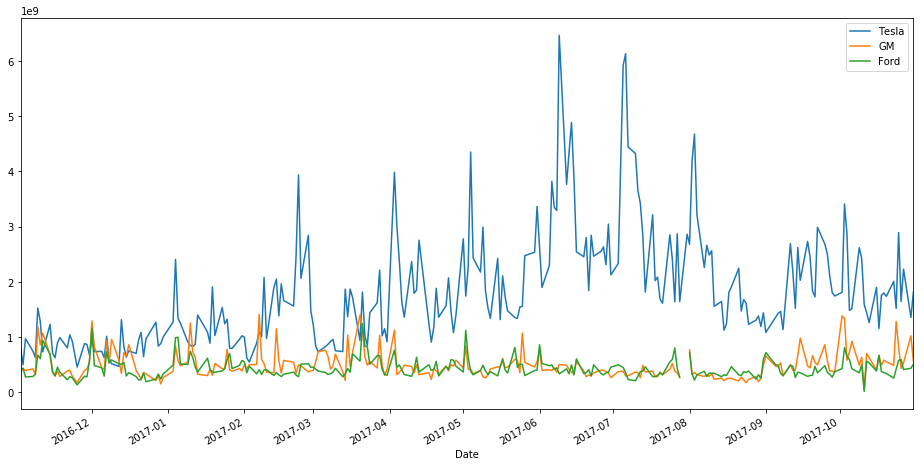

In [25]:
tesla['Total Traded'].plot(label='Tesla',figsize=(16,8))
gm['Total Traded'].plot(label='GM')
ford['Total Traded'].plot(label='Ford')
plt.legend();

This is the total 'amount of money traded'...

In [26]:
tesla['Total Traded'].argmax()

Timestamp('2017-06-09 00:00:00')

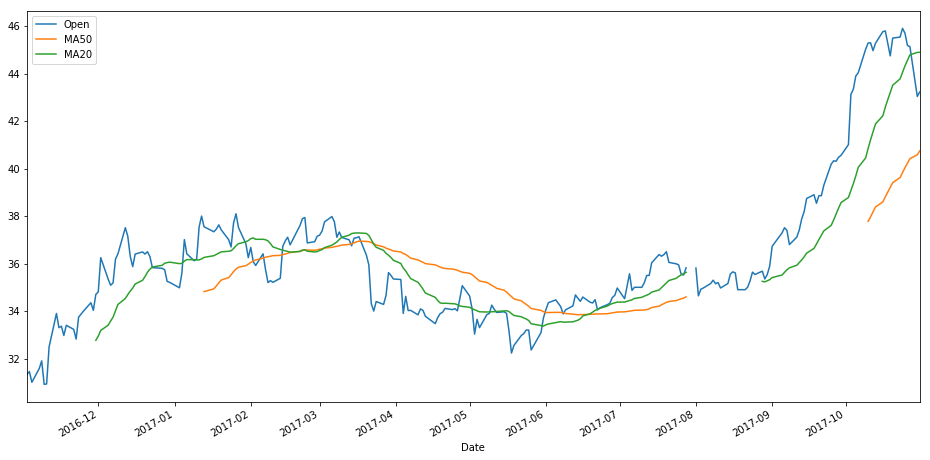

In [30]:
gm['MA50'] = gm['Open'].rolling(50).mean()
gm['MA20'] = gm['Open'].rolling(20).mean()
gm[['Open', 'MA50', 'MA20']].plot(figsize=(16,8))

In [33]:
from pandas.plotting import scatter_matrix

In [34]:
car_comp = pd.concat([tesla['Open'],gm['Open'],ford['Open']],axis=1)

In [36]:
car_comp.columns = ['Tesla Open','GM Open','Ford Open']

In [37]:
car_comp.head()

,Tesla Open,GM Open,Ford Open
Date,,,
2016-11-02,190.05,31.33,11.51
2016-11-03,189.00,31.45,11.39
2016-11-04,189.00,31.00,11.31
2016-11-07,193.59,31.58,11.52
2016-11-08,193.79,31.90,11.50


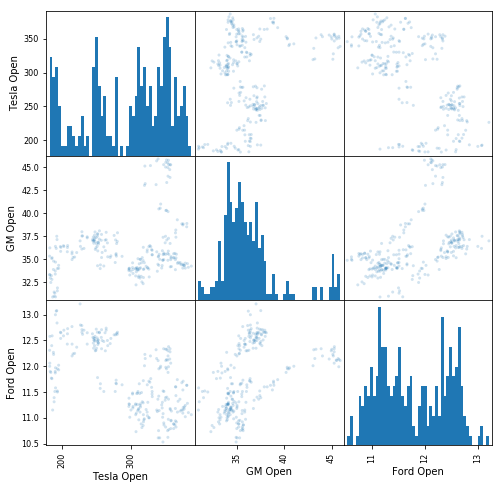

In [40]:
scatter_matrix(car_comp,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

In [41]:
from matplotlib.finance import candlestick_ohlc

In [42]:
from matplotlib.dates import DateFormatter,date2num,WeekdayLocator,DayLocator,MONDAY

In [43]:
ford.head()

,Open,High,Low,Close,Volume,Total Traded
Date,,,,,,
2016-11-02,11.51,11.56,11.36,11.40,36229377,4.170001e+08
2016-11-03,11.39,11.46,11.27,11.35,38651451,4.402400e+08
2016-11-04,11.31,11.50,11.30,11.34,24752417,2.799498e+08
2016-11-07,11.52,11.62,11.39,11.58,25120693,2.893904e+08
2016-11-08,11.50,11.51,11.35,11.48,28497894,3.277258e+08


In [44]:
# Grab everything from January 2012
ford_reset = ford.loc['2017-01'].reset_index()

In [46]:
ford_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
Date            20 non-null datetime64[ns]
Open            20 non-null float64
High            20 non-null float64
Low             20 non-null float64
Close           20 non-null float64
Volume          20 non-null int64
Total Traded    20 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 1.2 KB


In [47]:
ford_reset['date_ax'] = ford_reset['Date'].apply(lambda date: date2num(date))

In [48]:
# We have to reset the date object to a number for matplotlib.
ford_reset.head()

,Date,Open,High,Low,Close,Volume,Total Traded,date_ax
0,2017-01-03,12.20,12.60,12.13,12.59,40510821,4.942320e+08,736332.0
1,2017-01-04,12.77,13.27,12.74,13.17,77638075,9.914382e+08,736333.0
2,2017-01-05,13.21,13.22,12.63,12.77,75628443,9.990517e+08,736334.0
3,2017-01-06,12.80,12.84,12.64,12.76,40315887,5.160434e+08,736335.0
4,2017-01-09,12.79,12.86,12.63,12.63,39438393,5.044170e+08,736338.0


In [49]:
list_of_cols = ['date_ax', 'Open', 'High', 'Low', 'Close']
ford_values = [tuple(vals) for vals in ford_reset[list_of_cols].values ]

In [50]:
# Now we have a list of Tuples
# Each Tuple contains the info we need.
ford_values

[(736332.0, 12.199999999999999, 12.6, 12.130000000000001, 12.59),
 (736333.0, 12.77, 13.27, 12.74, 13.17),
 (736334.0, 13.210000000000001, 13.220000000000001, 12.630000000000001, 12.77),
 (736335.0, 12.800000000000001, 12.84, 12.640000000000001, 12.76),
 (736338.0,
  12.789999999999999,
  12.859999999999999,
  12.630000000000001,
  12.630000000000001),
 (736339.0, 12.699999999999999, 13.02, 12.66, 12.85),
 (736340.0, 12.710000000000001, 12.720000000000001, 12.51, 12.67),
 (736341.0, 12.66, 12.68, 12.35, 12.59),
 (736342.0, 12.619999999999999, 12.67, 12.5, 12.630000000000001),
 (736346.0, 12.65, 12.73, 12.539999999999999, 12.609999999999999),
 (736347.0, 12.43, 12.449999999999999, 12.300000000000001, 12.41),
 (736348.0, 12.4, 12.56, 12.34, 12.43),
 (736349.0, 12.449999999999999, 12.48, 12.31, 12.359999999999999),
 (736352.0, 12.35, 12.380000000000001, 12.220000000000001, 12.31),
 (736353.0, 12.35, 12.609999999999999, 12.34, 12.609999999999999),
 (736354.0,
  12.710000000000001,
  12.800

In [51]:
# From Documentation
mondays = WeekdayLocator(MONDAY)
alldays = DayLocator()
weekFormatter = DateFormatter('%b %d')
dayFormattter = DateFormatter('%d')

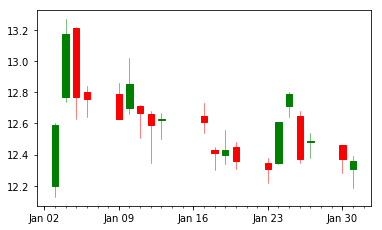

In [54]:
# From Documentation
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)

candlestick_ohlc(ax,ford_values,width=0.6,colorup='g',colordown='r');

In [55]:
tesla['returns'] = (tesla['Close'] / tesla['Close'].shift(1)) - 1

Or you can use the built in Pandas return method...

In [56]:
# tesla['returns'] = tesla['Close'].pct_change(1)

In [58]:
ford['returns'] = ford['Close'].pct_change(1)
gm['returns'] = gm['Close'].pct_change(1)

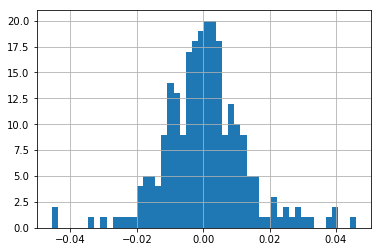

In [62]:
ford['returns'].hist(bins=50)

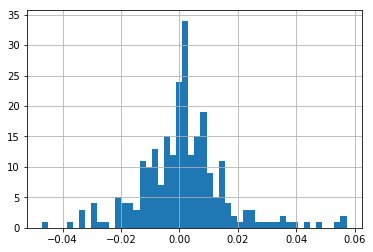

In [63]:
gm['returns'].hist(bins=50)

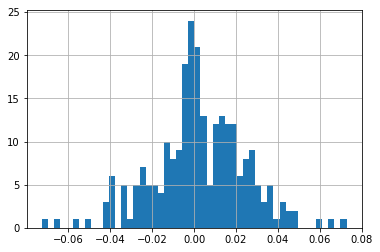

In [64]:
tesla['returns'].hist(bins=50)

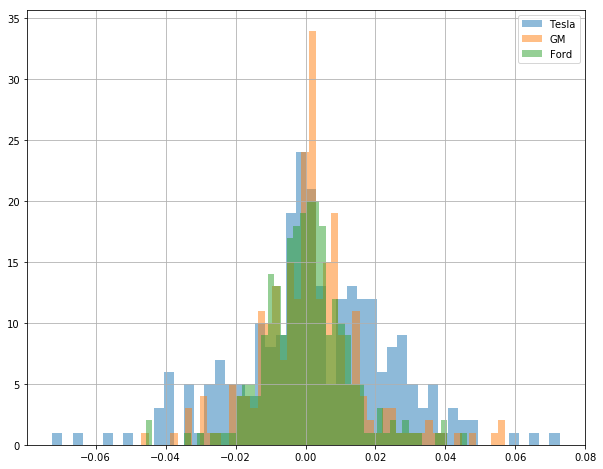

In [70]:
tesla['returns'].hist(bins=50,label='Tesla',figsize=(10,8),alpha=0.5)
gm['returns'].hist(bins=50,label='GM',figsize=(10,8),alpha=0.5)
ford['returns'].hist(bins=50,label='Ford',figsize=(10,8),alpha=0.5)
plt.legend();

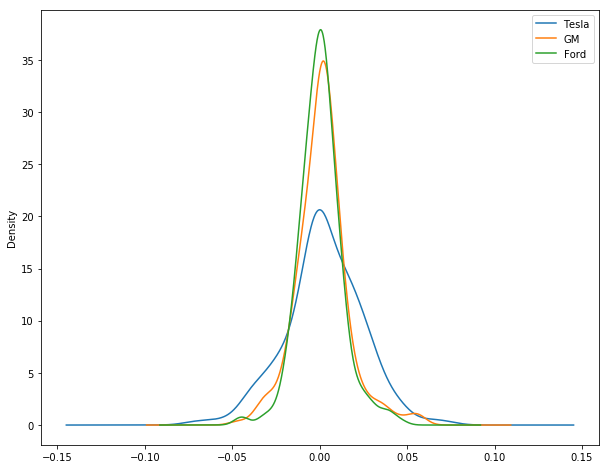

In [71]:
tesla['returns'].plot(kind='kde',label='Tesla',figsize=(10,8))
gm['returns'].plot(kind='kde',label='GM',figsize=(10,8))
ford['returns'].plot(kind='kde',label='Ford',figsize=(10,8))
plt.legend();

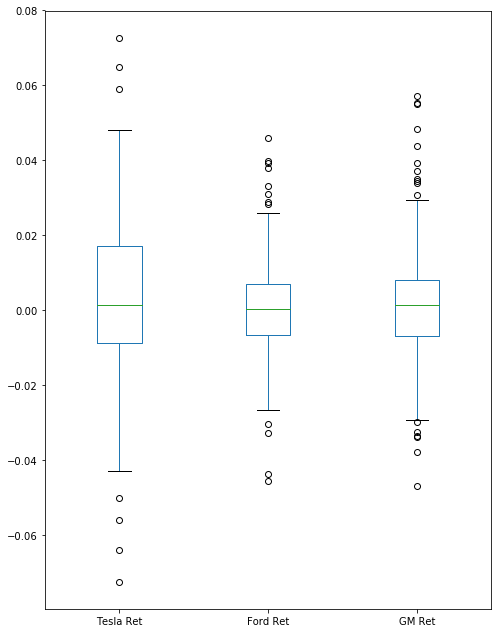

In [72]:
box_df = pd.concat([tesla['returns'],ford['returns'],gm['returns']],axis=1)
box_df.columns = ['Tesla Ret','Ford Ret','GM Ret']
box_df.plot(kind='box', figsize=(8,11))

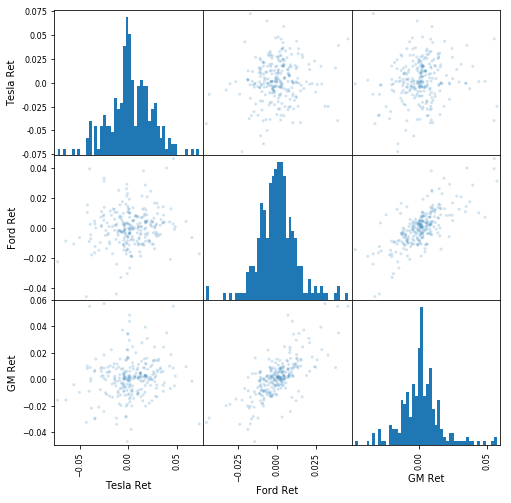

In [74]:
scatter_matrix(box_df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

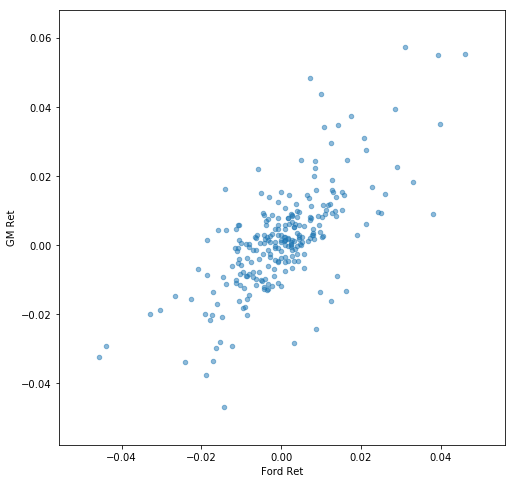

In [75]:
box_df.plot(kind='scatter',x='Ford Ret',y='GM Ret',alpha=0.5,figsize=(8,8))

In [77]:
tesla['Cumulative Return'] = (1 + tesla['returns']).cumprod()
gm['Cumulative Return'] = (1 + gm['returns']).cumprod()
ford['Cumulative Return'] = (1 + ford['returns']).cumprod()

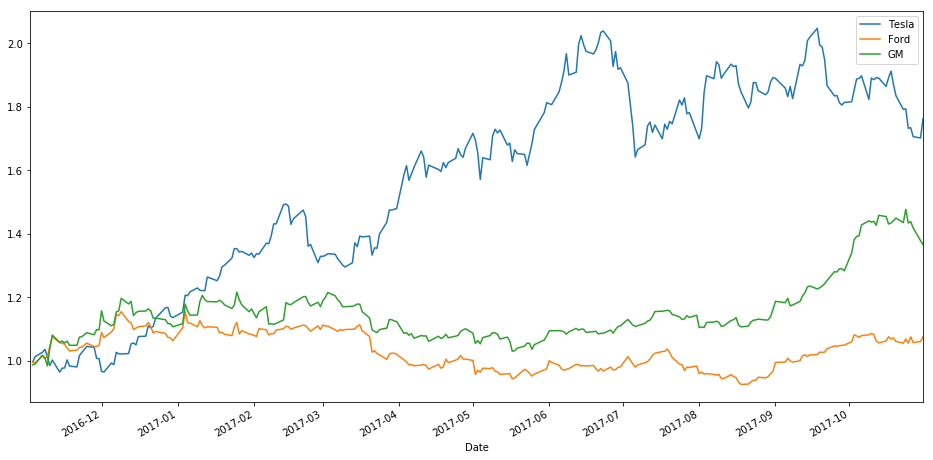

In [78]:
tesla['Cumulative Return'].plot(label='Tesla',figsize=(16,8))
ford['Cumulative Return'].plot(label='Ford')
gm['Cumulative Return'].plot(label='GM')
plt.legend();